**Pima Indians Diabetes Database**

In [1]:
from IPython.display import HTML
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=true;
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide Code"></form>''')

In [2]:
import os
print(os.listdir("../input"))

['diabetes.csv']


**Preprocessing**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils

Using TensorFlow backend.


In [39]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../input/diabetes.csv")
#df = df.drop('Unnamed: 0', axis=1)
print(df.head())
print(df.shape)
print(df.columns)

   Pregnancies  Glucose   ...     Age  Outcome
0            6      148   ...      50        1
1            1       85   ...      31        0
2            8      183   ...      32        1
3            1       89   ...      21        0
4            0      137   ...      33        1

[5 rows x 9 columns]
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


**Data Visualization**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

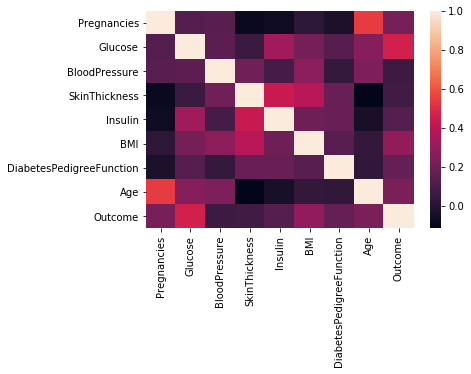

In [6]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Machine Learning**

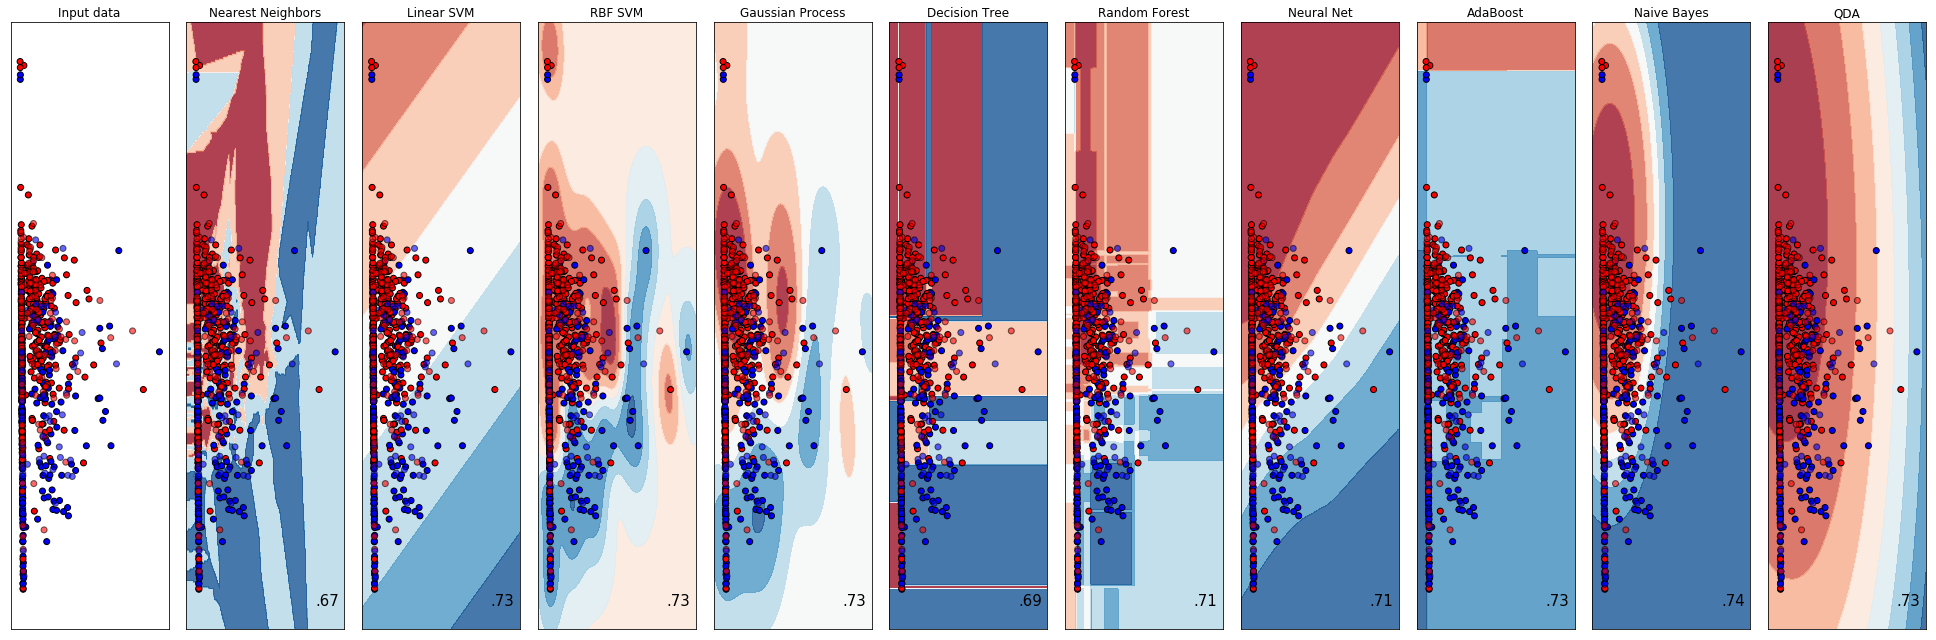

In [7]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = df.drop(['Outcome'], axis = 1).values
pca = PCA(n_components=2,svd_solver='full')
X = pca.fit_transform(X)
y = df['Outcome']


# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)

datasets = [df]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis = 1).values
Y = df['Outcome']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


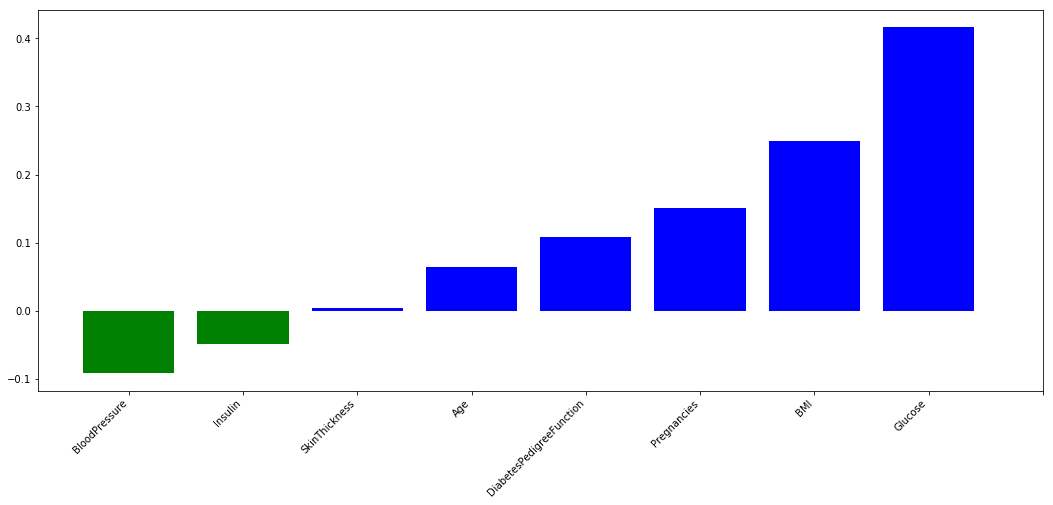

In [65]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(df.drop(['Outcome'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC().fit(X, Y)
feature_plot(trainedsvm, df.drop(['Outcome'], axis = 1).columns.values)

In [20]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Logistic Regression

In [21]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[133  17]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

   micro avg       0.79      0.79      0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



Random Forest

In [ ]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

Support Vector Machines

In [ ]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

Decision Tree

In [ ]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names=df.drop(['Outcome'], axis = 1).columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

Linear Discriminant Anaylsis

In [ ]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

Naive Bayes

In [ ]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

XGBoost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_Train, Y_Train)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

In [ ]:
from itertools import product
import itertools

predictions =model.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

# Thanks to: https://www.kaggle.com/tejainece/data-visualization-and-machine-learning-algorithms
def plot_confusion_matrix(cm, classes=["0", "1"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix ' +title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot = confusion_matrix(Y_Test,predictions)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'XGBClassifier')

**Feature Engineering**

Principal Component Analysis

In [ ]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

# pca = PCA(n_components=2,svd_solver='full')
# X_reduced = pca.fit_transform(X_Train)
#X_reduced = TSNE(n_components=2).fit_transform(X_Train, Y_Train)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_reduced,Y_Train)
trainedmodel = LogisticRegression().fit(X_reduced,Y_Train)

# pca = PCA(n_components=2,svd_solver='full')
# X_test_reduced = pca.fit_transform(X_Test)
#X_test_reduced = TSNE(n_components=2).fit_transform(X_Test, Y_Test)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

print('Random Forest')
predictionforest = trainedforest.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print('Logistic Regression')
predictions =trainedmodel.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

In [ ]:
reduced_data = X_reduced

trainednb = GaussianNB().fit(reduced_data, Y_Train)
trainedsvm = svm.LinearSVC().fit(reduced_data, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(reduced_data,Y_Train)
trainedmodel = LogisticRegression().fit(reduced_data,Y_Train)

# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data[:, 0], reduced_data[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Linear Discriminant Analysis

In [ ]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=2)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
print(lda.explained_variance_ratio_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_lda, Y, test_size = 0.30, random_state = 101)

trainednb = GaussianNB().fit(X_reduced, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_reduced, Y_Train)

print('Naive Bayes')
predictionnb = trainednb.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

print('SVM')
predictionsvm = trainedsvm.predict(X_test_reduced)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

t-SNE

In [ ]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=Y,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

**Clustering**

In [ ]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_)

# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_lda.shape[1])
print(pca.explained_variance_ratio_)

X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)

K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced)

In [ ]:
kpredictions = kmeans.predict(X_test_reduced)
print(confusion_matrix(Y_Test,kpredictions))
print(classification_report(Y_Test,kpredictions))

In [ ]:
plt.scatter(X_test_reduced[kpredictions ==0,0], X_test_reduced[kpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[kpredictions ==1,0], X_test_reduced[kpredictions == 1,1], s=100, c='black')

Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hierarchicalpredictions = hc.fit_predict(X_test_reduced)

In [ ]:
plt.scatter(X_test_reduced[hierarchicalpredictions ==0,0], X_test_reduced[hierarchicalpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[hierarchicalpredictions ==1,0], X_test_reduced[hierarchicalpredictions == 1,1], s=100, c='black')

****Deep Learning****

In [ ]:
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization, Activation

#Y_Test = to_categorical(Y_Test)

input_dim = X_Train.shape[1]
nb_classes = Y_Train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_Train, Y_Train, nb_epoch=50, batch_size=16, validation_split=0.1, verbose=80)

preds = model.predict_classes(X_Test, verbose=0)

In [ ]:
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))